In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

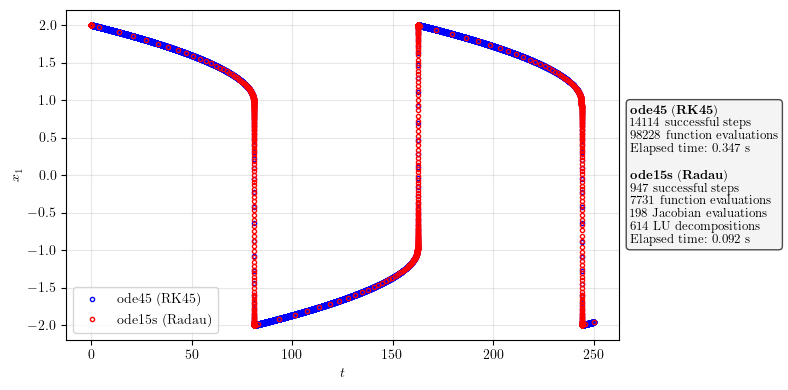

In [2]:
def vdp_derivatives(t, y, mu):
    # y[0] = x, y[1] = dx/dt
    return [y[1], mu * (1 - y[0]**2) * y[1] - y[0]]

def plot_stiff_comparison():
    mu = 100
    t_span = (0, 2.5 * mu)
    y0 = [2.0, 0.0]

    start_time = time.time()
    sol_explicit = solve_ivp(
        vdp_derivatives, t_span, y0,
        method='RK45', args=(mu,),
        rtol=1e-6, atol=1e-8
    )
    explicit_duration = time.time() - start_time

    start_time = time.time()
    sol_stiff = solve_ivp(
        vdp_derivatives, t_span, y0,
        method='Radau', args=(mu,),
        rtol=1e-6, atol=1e-8
    )
    stiff_duration = time.time() - start_time

    fig, ax = plt.subplots(figsize=(8, 4))

    ax.plot(sol_explicit.t, sol_explicit.y[0],
            'bo', ms=3, mfc='none', label='ode45 (RK45)')
    ax.plot(sol_stiff.t, sol_stiff.y[0],
            'ro', ms=3, mfc='none', label='ode15s (Radau)')

    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$x_1$')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='lower left')

    stats_text = (
        r"$\bf{ode45\ (RK45)}$" + "\n"
        f"{len(sol_explicit.t)} successful steps\n"
        f"{sol_explicit.nfev} function evaluations\n"
        f"Elapsed time: {explicit_duration:.3f} s\n\n"
        r"$\bf{ode15s\ (Radau)}$" + "\n"
        f"{len(sol_stiff.t)} successful steps\n"
        f"{sol_stiff.nfev} function evaluations\n"
        f"{sol_stiff.njev} Jacobian evaluations\n"
        f"{sol_stiff.nlu} LU decompositions\n"
        f"Elapsed time: {stiff_duration:.3f} s"
    )

    props = dict(boxstyle='round', facecolor='#f0f0f0', alpha=0.7)
    ax.text(1.02, 0.5, stats_text,
            transform=ax.transAxes,
            va='center', fontsize=9,
            bbox=props, family='monospace')

    plt.tight_layout()
    plt.savefig('../../../figs/ode/stiff_comparison.pdf', bbox_inches='tight', transparent=True)
    plt.show()

plot_stiff_comparison()